In [10]:
from fastai.vision.all import * 

In [13]:
path = untar_data(URLs.PETS)/'images'# 그림이 저장되어 있는 폴더의 주소

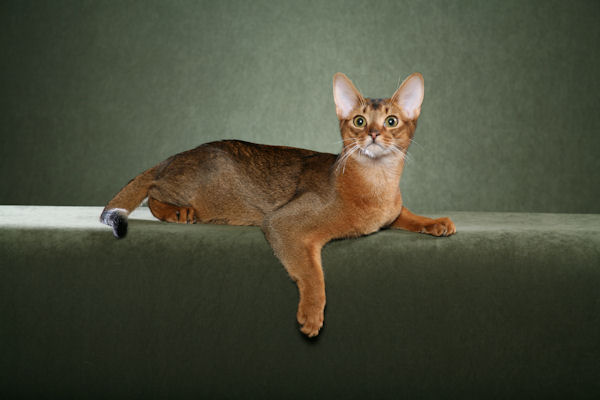

In [14]:
PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

> ### path에 있는 그림을 좀 더 효율적으로 확인해보자

In [22]:
# path에 저장된 주소엣서 이미지 파일의 주소만 추출하는 함수
files= get_image_files(path)
files

(#7390) [Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [23]:
files[0]

Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

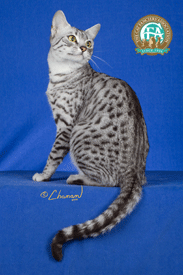

In [25]:
PILImage.create(files[0])
# 아래와 동일
# PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

- 대문자 -> 고양이
- 소문자 -> 강아지
- 이미지 크기 서로 상이 -> 모델 학습을 통해 이미지 분류를 용이하게 하기 위해 이미지 크기 통일 필요

In [26]:
def label_func(fname):
    if fname[0].isupper():
        return 'cat'
    else:
        return 'dog'
    
label_func = lambda fname : 'cat' if fname[0].isupper() else  'dog'

In [31]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224))

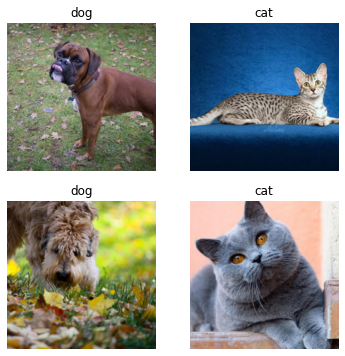

In [32]:
dls.show_batch(max_n=4)

### 학습 시켜보자

In [35]:
# 우리의 1차 목표: 이미지 -> 개/고양이 판단하는 모형(resnet34)을 채용하고, 그 모형에 데이터를 넣어서 학습하고, 그 모형의 결과를 판단하고 싶다. (즉 classifier를 만든다는 소리)
# 우리의 2차 목표: 그 모형에 "새로운" 자료를 전달하여 이미지를 분류할 것이다. (즉 classifier를 사용해보자)

# cnn_learner 라는 함수를 이용해서 1차목표와 2차목표를 달성할 "썸띵(Object)"을 만들것임. 
# 오브젝트란? 정보와 함수를 동시에 가지는 어떠한 집합체 
# 오브젝트.명사이름 : 이것 통채로 하나의 변수처럼 쓸 수 있음. 
# 오브젝트.동사이름 : 이것 통채로 하나의 함수처럼 쓸 수 있음. (이때 함수의 첫번째 입력은 명시하지 않아도 오브젝트 그 자체가 된다)

## clafr에 필요한 명사(=정보) <- 우리가 넣어줘야하는 것들이 대부분
# (1) 모델정보: classifier로 어떤 모델을 채용할 것인가? (유명한 모델이 무엇인가? 잘 맞추는 모델이 무엇인가)
# (2) 데이터: 데이터를 줘야함
# (3) 평가기준표: 채점을 할 지표 
## clafr에 필요한 동사(=함수) <- 이미 구현이 되어있음 
# (1) 학습 
# (2) 결과를 판단
# (3) 예측 

clsfr = cnn_learner(dls,resnet34,metrics=error_rate)

In [25]:
clsfr.fine_tune(1) # 학습을 하는 함수

epoch,train_loss,valid_loss,error_rate,time
0,0.137038,0.022387,0.006089,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.083019,0.023682,0.005413,00:53


- 기존 데이터를 잘 맞추는지 확인

In [29]:
clsfr.predict(files[7])
# 강아지라고 맞춰야 함

('dog', TensorBase(1), TensorBase([8.5275e-09, 1.0000e+00]))

- 학습 결과를 보여주는 메서드

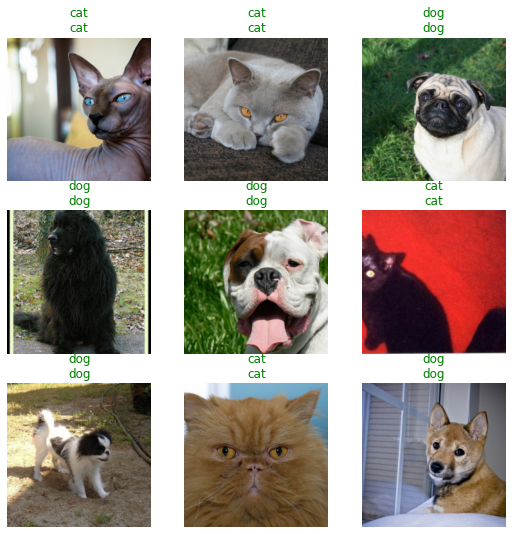

In [30]:
clsfr.show_results(max_n=4, shuffle=False)

### 오답분석

In [31]:
interpreter = Interpretation.from_learner(clsfr) # 오답을 분석하는 object를 만듦.. 재료는 클래시파이어! 

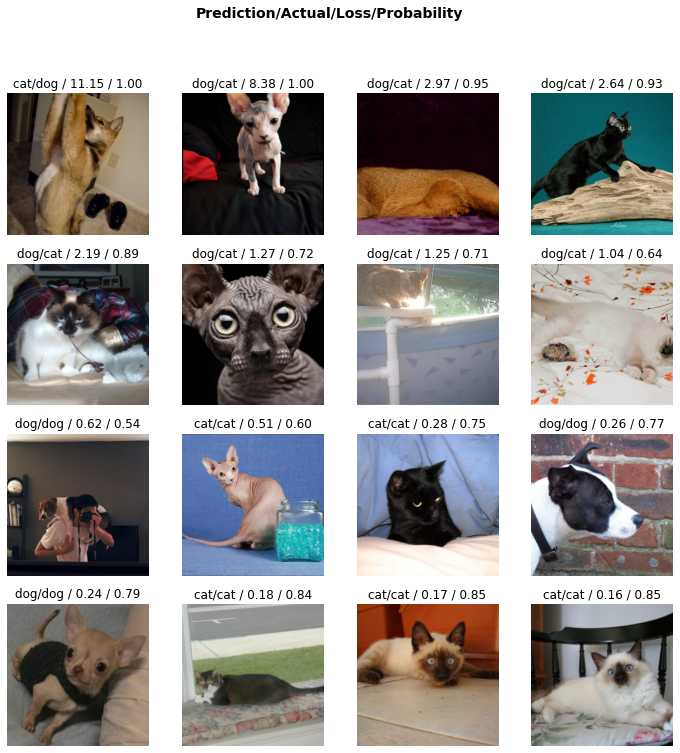

In [32]:
interpreter.plot_top_losses(16) # 가장 오류가 높은 이미지들을 정렬하여 보여주는 메서드

In [33]:
clsfr.predict(files[7])

('dog', TensorBase(1), TensorBase([8.5275e-09, 1.0000e+00]))

In [23]:
clsfr.predict('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg')

NameError: name 'clsfr' is not defined

In [35]:
clsfr.predict(PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg'))

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3439e-10]))

# $\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star$

- clsfr로 예측할 때
  - 이미지파일의 주소를 넣어줘도 되고(맨앞에 Path가 붙어있는 경우와 그렇지 않은 경우 두가지)
  - PILImage.creat로 생성한 이미지 자체를 넣어줘도 무방!
- PILImage로 사진 확인할 때도
  - 이미지파일의 주소 자체를 넣어주는 경우
  - 앞에 path가 붙어있는 경우 

# $\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star$

- 인터넷에 있는 이미지파일의 주소를 이용하여 이미지 분류하는 방법

In [40]:
img=PILImage.create(requests.get('http://image.dongascience.com/Photo/2022/06/6982fdc1054c503af88bdefeeb7c8fa8.jpg').content)
clsfr.predict(img)

('dog', TensorBase(1), TensorBase([7.3712e-06, 9.9999e-01]))